<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: MohammadParsa Dini

**Student ID**: 400101204


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# ****Support Vector Machines****

In this notebook, you will implement SVM for three datasets. You will become more familiar with the Soft-Margin SVM and the Kernel trick, which makes SVM extremely powerful.

Before we start our implementation, you must be comfortable with the theoretical details of the Soft-Margin SVM as an optimization problem and be able to derive the dual formulation for this problem. In the next sections, you will solve the dual optimization problem for all datasets using the CVXPY library, which has been developed for solving convex optimization problems. To get more familiar with CVXPY programming, you can use this [link](https://www.cvxpy.org).

This is the primal formulation for the Soft-Margin SVM for linearly separable data with slack variables $\xi_i \ge 0$:

\begin{equation*}
\begin{aligned}
& {\text{min.}}
& & \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{N} \xi_i \\
& \text{s.t.}
& & y_i(w^T x_i + b) \geq 1 - \xi_i, \; i = 1, \ldots, N \\
& & & \xi_i \geq 0, \; i = 1, \ldots, N
\end{aligned}
\end{equation*}

Where $w$ represents the weight vector, $b$ is the bias term, and $C$ is the regularization parameter controlling the trade-off between a wide margin and misclassification.

**Theoretical Questions:**

1) Derive the dual optimization problem for the Soft-Margin SVM.

2) How do we calculate the weights and bias ($w$ and $b$) using the dual problem optimum points?

3) How do we classify new data points using the optimal weights and bias?

<font color='green'>Write down your answers as markdown here.</font>



#1)
The primal formulation of the Soft-Margin SVM is given by:

\[
\begin{aligned}
& \text{minimize} \quad & \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{N} \xi_i \\
& \text{subject to} \quad & y_i(w^T x_i + b) \geq 1 - \xi_i, \; i = 1, \ldots, N \\
& & \xi_i \geq 0, \; i = 1, \ldots, N
\end{aligned}
\]

To derive the dual problem, we introduce Lagrange multipliers $(\alpha_i \geq 0$) for the constraints $(y_i(w^T x_i + b) \geq 1 - \xi_i$) and $(\mu_i \geq 0$) for the constraints $(\xi_i \geq 0$). The Lagrangian is:

$
L(w, b, \xi, \alpha, \mu) = \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{N} \xi_i - \sum_{i=1}^{N} \alpha_i [y_i(w^T x_i + b) - 1 + \xi_i] - \sum_{i=1}^{N} \mu_i \xi_i
$

Taking the partial derivatives of $(L$) with respect to $(w$), $(b$), and ($\xi_i$) and setting them to zero, we get:

$
\frac{\partial L}{\partial w} = w - \sum_{i=1}^{N} \alpha_i y_i x_i = 0 \implies w = \sum_{i=1}^{N} \alpha_i y_i x_i
$

$
\frac{\partial L}{\partial b} = -\sum_{i=1}^{N} \alpha_i y_i = 0 \implies \sum_{i=1}^{N} \alpha_i y_i = 0
$

$
\frac{\partial L}{\partial \xi_i} = C - \alpha_i - \mu_i = 0 \implies \alpha_i \leq C
$

Substituting these into the Lagrangian, we get the dual problem:

\[
\begin{aligned}
& \text{maximize} \quad & \sum_{i=1}^{N} \alpha_i - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_j x_i^T x_j \\
& \text{subject to} \quad & 0 \leq \alpha_i \leq C, \; i = 1, \ldots, N \\
& & \sum_{i=1}^{N} \alpha_i y_i = 0
\end{aligned}
\]


#2)
Once we have the optimal $(\alpha_i$) from the dual problem, the weight vector $(w$) can be calculated as:

$
w = \sum_{i=1}^{N} \alpha_i y_i x_i
$

To calculate the bias $(b$), we use the support vectors (data points for which $(0 < \alpha_i < C$)). For any support vector $(x_k$), the bias $(b$) can be computed as:

$
b = y_k - w^T x_k$


#3)
To classify a new data point $(x$), we use the decision function:

$
f(x) = w^T x + b
$

The classification is determined by the sign of $(f(x)$):

\[
class = \begin{cases}
+1 & \text{if } f(x) \geq 0 \\
-1 & \text{if } f(x) < 0
\end{cases}
\]

This decision function uses the optimal weights $(w$) and bias $(b$) obtained from solving the dual problem.


Sometimes, the data is not linearly separable. Therefore, the previous formulation of the Soft-Margin SVM does not give a good accuracy for the classification problem. The Kernel trick is a technique used in such situations. Consider $x$ as your input features with dimension $p$. One can use function $\phi: R^p → R^d$ to map the input features to another space with dimension $d$. Finding good $\phi$ such that data points become near linearly separable makes the previous formulation of the problem and its dual useful by replacing $\phi(x_i)$ for $x_i$ in the problem definition. The function $\phi(x)$ can even be a mapping to an infinite-dimensional space.

If you have found the correct dual form of the Soft-Margin SVM in the previous formulation, you can see that the terms $x_i^T x_j$ will appear in the problem formulation and the prediction rule. These terms will be replaced with $\phi(x_i)^T \phi(x_j)$ when we use $\phi$ as our feature mapping function. Given a feature mapping $\phi$ we define its corresponding **Kernel** to be:

\begin{equation*}
\begin{aligned}
& K(x, z) = \phi(x)^T \phi(z)
\end{aligned}
\end{equation*}

Hence, in the dual optimization problem and the prediction rule of the Soft-Margin SVM, we can replace all terms in the form $x^T z$ with $K(x, z)$. This technique is called the Kernel trick.

Now, given $\phi$, we could easily compute $K(x,z)$ by finding $\phi(x)$ and $\phi(z)$ and taking their inner product. But what’s more interesting is that often, $K(x,z)$ may be very inexpensive to calculate, even though $\phi(x)$ itself may be very expensive to calculate (perhaps because it is an extremely high-dimensional vector). Check Stanford's CS229 [notes](https://see.stanford.edu/materials/aimlcs229/cs229-notes3.pdf) on SVM and the Kernel trick for more details and examples.

## Libraries

Here are some useful libraries for the implementation. You can add or remove any libraries as you wish. Note that you cannot use sklearn or similar libraries for implementation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import cvxpy as cp

## **Dataset Exploration**

In this notebook, you'll be working with three datasets, specifically named "DF1.csv", "DF2.csv", and "DF3.csv". Each dataset entry is composed of a 2-dimensional feature vector and a label, which is either "1" or "-1". The primary objective of this notebook is to leverage SVM to develop a robust classifier for each dataset.

You are given three kernels as follows:



1.   Linear Kernel: $K(x, z) = x^T z$
2.   Polynomial Kernel of degree 2: $K(x, z) = (1 + ∑_{i = 1}^{p} x_i z_i)^2$, where $p$ is the dimension of the feature space.
3.   RBF Kernel: $K(x, z) = e^{-\frac{||x-z||_2^2}{2σ^2}}$

Before implementing, you must choose the correct kernel for each dataset. Note that each kernel must be used exactly for one dataset. Therefore, you cannot use one of the kernels twice. As a part of our grading scheme, what matters with respect to accuracy is the sum of the accuracies you reach for all three datasets, and the accuracy of each model does not have any separate score. Thus, it would help if you chose the most appropriate kernel for each dataset so that all datasets reach a reasonably good accuracy.





Load all datasets and show the first 5 rows of each.

In [4]:
## YOUR CODE HERE

# Loading the datasets
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DF1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DF2.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DF3.csv')

# Showing the 5 first rows of each dataset
print('----------------------------------')
print("DF1:")
print(df1.head())
print('-------------------')
print("DF2:")
print(df2.head())
print('-------------------')
print("DF3:")
print(df3.head())
print('----------------------------------')

----------------------------------
DF1:
         x1        x2  y
0  6.462652  5.121478 -1
1 -6.586541 -7.721287  1
2  9.239683 -8.595738 -1
3  4.250052  2.143755  1
4  8.219779 -3.609733 -1
-------------------
DF2:
         x1         x2  y
0  2.937145  77.102291  1
1 -0.029344  44.802353  1
2  5.868818  44.595757 -1
3  8.609281  49.223945 -1
4  7.763276 -14.340750 -1
-------------------
DF3:
         x1        x2  y
0 -0.517768 -0.466158 -1
1  0.940985  0.235175  1
2 -0.470720  0.917120  1
3  0.712716 -0.097401 -1
4 -0.608773 -0.107034 -1
----------------------------------


Use the following function to visualize the datapoints for all datasets.


Visualizing DF1:


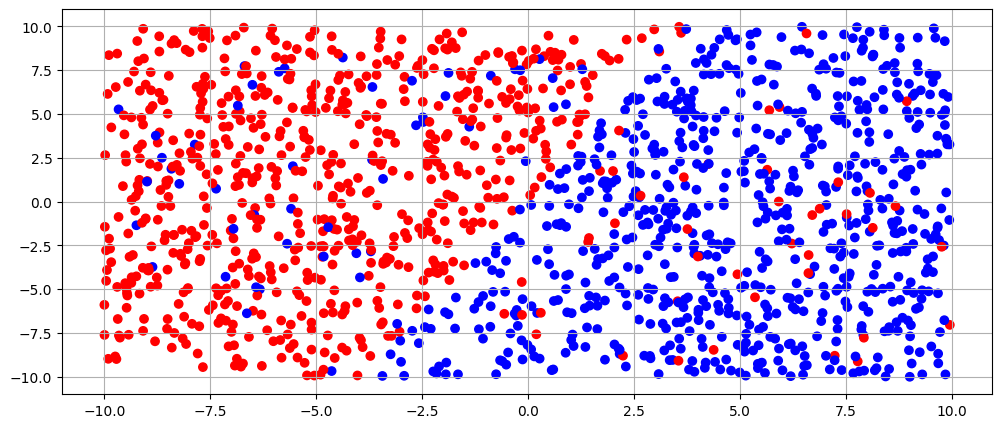


Visualizing DF2:


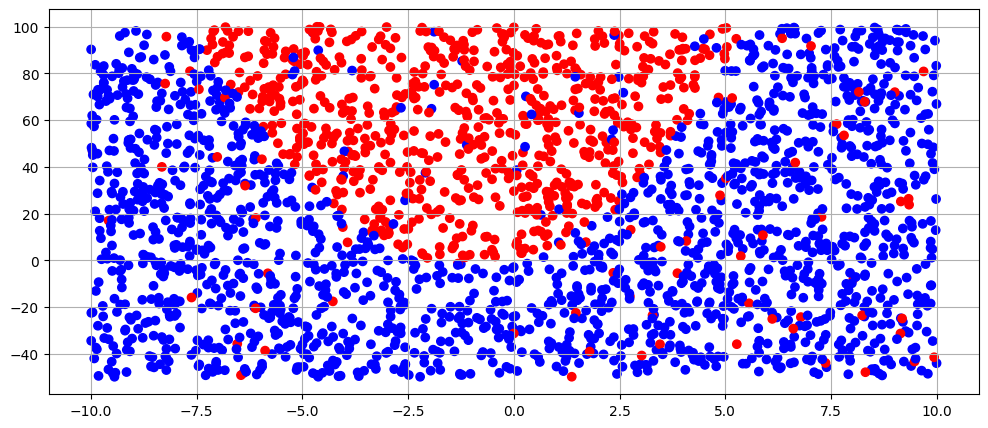


Visualizing DF3:


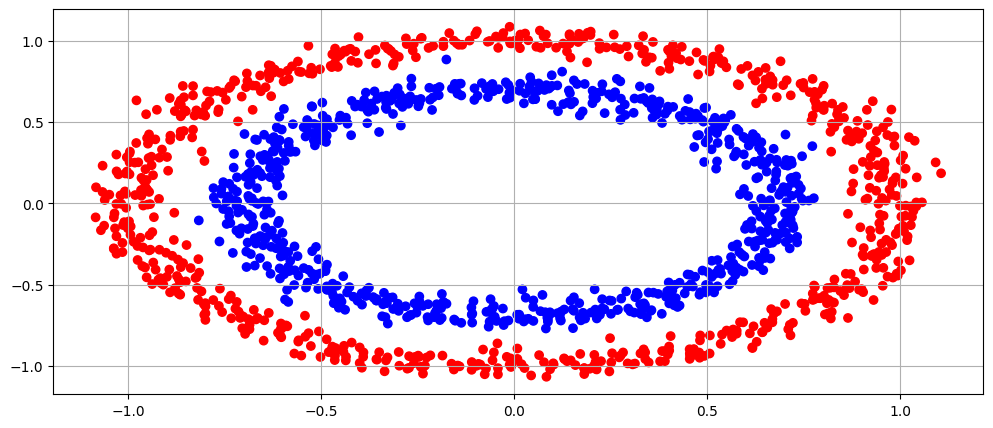

In [6]:
def visualize_data(X, y):
  col = []
  for i in range(len(y)):
    if y[i] == 1:
      col.append('red')
    else:
      col.append('blue')
  plt.figure(figsize=(12,5))
  plt.grid()
  plt.scatter(X[ : , 0], X[ : , 1], color = col)
  plt.show()

## YOUR CODE HERE



# Extract features and labels from DataFrame 1
X1, y1 = df1[['x1', 'x2']].values, df1['y'].values
# Extract features and labels from DataFrame 2
X2, y2 = df2[['x1', 'x2']].values, df2['y'].values
# Extract features and labels from DataFrame 3
X3, y3 = df3[['x1', 'x2']].values, df3['y'].values

# Print a message and visualize the first dataset
print("\nVisualizing DF1:")
visualize_data(X1, y1)

# Print a message and visualize the second dataset
print("\nVisualizing DF2:")
visualize_data(X2, y2)

# Print a message and visualize the third dataset
print("\nVisualizing DF3:")
visualize_data(X3, y3)



**Theoretical Question:**

Which kernel will you use for each dataset? Justify your answer.

Note: your implementation must follow your choice here. Otherwise, you do not recieve any points for your implemetation.



## My Kernel Choices:

### DF1: $Linear Kernel$
The data in DF1 is linearly separable or nearly linearly separable. Therefore, a
linear kernel should be sufficient to fit the data.

### DF2: $RBF Kernel$
The data in DF2 appears to have a more complex, non-linear structure. A linear kernel might not be sufficient to fit the data.

### DF3: $Polynomial Kernel$ (polynomial of degree 2)
The data in DF3 might exhibit patterns that are polynomially separable. A polynomial kernel can be effective for such data, especially when the data lies on or near a polynomial decision boundary. let $\Phi(x) = [1, x, x^2]^T$ in this regard.


<font color='green'>Write down your answers as markdown here.</font>

## Dataset one (DF1.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [7]:
## YOUR CODE HERE

# Splitting DF1 into train and test sets (20% for test)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)


# Scaling the data
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [8]:
# ## YOUR CODE HERE

# Implement SVM using CVXPY with Linear Kernel for DF1
def svm_cvxpy_linear(X_train, y_train):
    n = X_train.shape[0]  # Number of training samples
    d = X_train.shape[1]  # Number of features

    # Variables
    alpha = cp.Variable(d)  # Weight vector
    xi = cp.Variable(n)     # Slack variables
    b = cp.Variable()       # Bias term

    C = 1.0  # Regularization parameter

    # Define the objective function and constraints
    objective = cp.Minimize(0.5 * cp.norm(alpha, 2) + C * cp.sum(xi))
    constraints = [cp.multiply(y_train, (X_train @ alpha + b)) >= 1 - xi, xi >= 0]

    # Problem
    prob = cp.Problem(objective, constraints)
    prob.solve()  # Solve the optimization problem

    return alpha.value, b.value  # Return the optimal values of alpha and b

# Train SVM for DF1 using Linear Kernel
alpha1, b1 = svm_cvxpy_linear(X1_train_scaled, y1_train)
print("alpha value:", alpha1)  # Print the optimal weight vector
print("b value:", b1)          # Print the optimal bias term


alpha value: [-2.12229046  0.57111142]
b value: -0.15608495557873855


Predict the class of each entry in the test set using your learned model.

In [9]:
# ## YOUR CODE HERE





# Predicting function
def predict(X, w, b):
    return np.sign(X @ w + b)

# Evaluating the model
y1_pred_train = predict(X1_train, alpha1, b1)
y1_pred_test = predict(X1_test, alpha1, b1)

Use classification_report function (from sklearn) to get the accuracy of your model.

In [11]:
## YOUR CODE HERE


print('-------------------------------------------')
print("Training Classification Report for DF1:")
print(classification_report(y1_train, y1_pred_train))
print('--------------------------')
print("Test Classification Report for DF1:")
print(classification_report(y1_test, y1_pred_test))
print('-------------------------------------------')

-------------------------------------------
Training Classification Report for DF1:
              precision    recall  f1-score   support

          -1       0.92      0.91      0.92       618
           1       0.91      0.92      0.91       562

    accuracy                           0.92      1180
   macro avg       0.91      0.92      0.92      1180
weighted avg       0.92      0.92      0.92      1180

--------------------------
Test Classification Report for DF1:
              precision    recall  f1-score   support

          -1       0.92      0.93      0.92       148
           1       0.93      0.92      0.92       148

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296

-------------------------------------------


Decision Boundary for DF1:


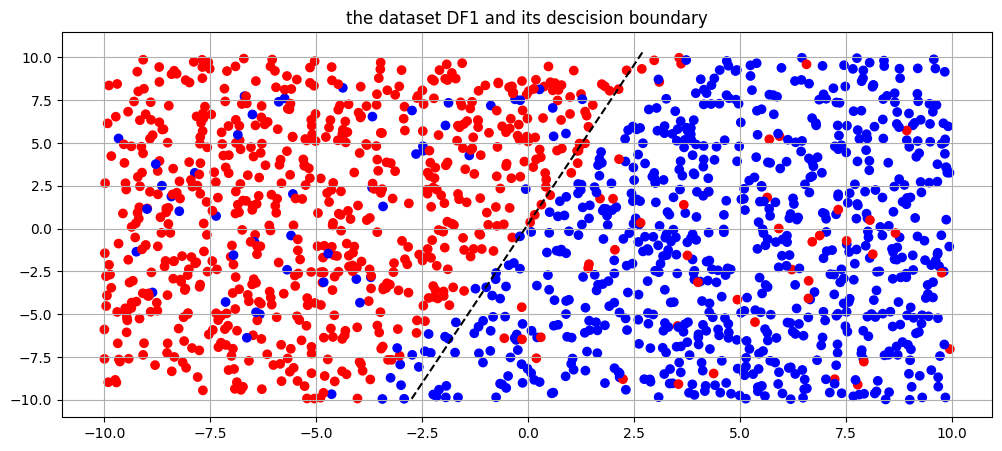

In [16]:
# Visualizing the decision boundary
def plot_decision_boundary(X, y, w, b):
    # Plot the original data points
    col = ['red' if label == 1 else 'blue' for label in y]
    plt.figure(figsize=(12,5))
    plt.scatter(X[:, 0], X[:, 1], color=col)
    plt.title('the dataset DF1 and its descision boundary')
    plt.grid()
    # Plot the decision boundary
    ax = plt.gca()
    x_vals = np.linspace(ax.get_xlim()[0]/4, ax.get_xlim()[1]/4, 100)
    y_vals = -(w[0] * x_vals + b) / w[1]
    plt.plot(x_vals, y_vals, 'k--')
    plt.xlim(ax.get_xlim())  # ensure the same scale
    plt.ylim(ax.get_ylim())  # ensure the same scale
    plt.show()

print("Decision Boundary for DF1:")
plot_decision_boundary(X1, y1, alpha1, b1)

## Dataset two (DF2.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [17]:
## YOUR CODE HERE


# doing the same thing for DF2
# Split DF2 into train and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Scale data
scaler2 = StandardScaler()
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)

Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [27]:
## YOUR CODE HERE


# Function to calculate the RBF kernel matrix for a given dataset
def calculate_rbf_kernel_matrix(data, sigma=1):
    num_samples = data.shape[0]  # Number of samples in the dataset
    kernel_matrix = np.zeros((num_samples, num_samples))  # Initialize the kernel matrix
    # Compute the RBF kernel value for each pair of samples
    for i in range(num_samples):
        for j in range(i, num_samples):
            kernel_value = calculate_rbf_kernel(data[i], data[j], sigma)
            kernel_matrix[i, j] = kernel_value
            kernel_matrix[j, i] = kernel_value  # Symmetric matrix
    return kernel_matrix

# Function to calculate the RBF kernel value between two samples
def calculate_rbf_kernel(x1, x2, sigma=1):
    distance = np.linalg.norm(x1 - x2)  # Euclidean distance between the samples
    return np.exp(-distance**2 / (2 * sigma**2))  # RBF kernel formula

# Function to implement SVM using CVXPY with RBF Kernel
def svm_cvxpy_rbf(y_train, X2_train_scaled, C=0.5):
    N2 = len(y_train)  # Number of training samples
    alphas = cp.Variable(N2)  # Lagrange multipliers
    # Define the kernel function and compute the kernel matrix
    kernel_function2 = [calculate_rbf_kernel_matrix, calculate_rbf_kernel]
    kernel_matrix = kernel_function2[0](X2_train_scaled)
    # Define the dual objective function
    objective_dual = cp.Minimize(-cp.sum(alphas) + cp.quad_form(cp.multiply(alphas, y_train), cp.psd_wrap(kernel_matrix)))
    # Define the constraints
    constraints = [alphas >= 0, alphas <= C, cp.sum(cp.multiply(alphas, y_train)) == 0]
    # Define and solve the optimization problem
    problem = cp.Problem(objective_dual, constraints)
    problem.solve()

    return alphas.value  # Return the optimal values of alphas

# Function to compute the bias term for the SVM
def compute_bias(labels, X2_train_scaled, alphas, regularization_param=0.5):
    kernel_functions = [calculate_rbf_kernel_matrix, calculate_rbf_kernel]
    kernel_matrix = kernel_functions[0](X2_train_scaled)
    num_samples = len(labels)
    bias = 0
    epsilon = 1e-6
    # Compute the bias term using the support vectors
    for i, yi in enumerate(labels):
        if not(np.linalg.norm(alphas[i]) < epsilon):  # Check if alpha is non-zero
            temp_bias = yi
            count_samples = 1
            for j, yj in enumerate(labels):
                if not(np.linalg.norm(alphas[j]) < epsilon):  # Check if alpha is non-zero
                    temp_bias -= alphas[j] * yj * kernel_matrix[j, i]
                    count_samples += 1
            bias += temp_bias
    return bias / num_samples  # Return the average bias

# Regularization parameter
C = 1
# Train SVM for DF2 using RBF Kernel
alpha2 = svm_cvxpy_rbf(y2_train, X2_train_scaled, C)
# Compute the bias term for DF2
bias2 = compute_bias(y2_train, X2_train_scaled, alpha2, C)


Predict the class of each entry in the test set using your learned model.

In [28]:
## YOUR CODE HERE


# Function to predict labels using an RBF kernel
def predict_rbf_kernel(kernel_function, alphas, training_data, labels, test_data, intercept):
    predictions = []  # Initialize an empty list to store predictions
    for test_point in test_data:
        # Calculate the prediction for each test point
        prediction = sum(alpha * label * kernel_function(test_point, train_point)
                         for alpha, label, train_point in zip(alphas, labels, training_data))
        predictions.append(prediction)
    # Convert predictions to a numpy array and add the intercept term
    predictions = np.array(predictions) + intercept
    # Apply the decision rule to classify the predictions
    predictions = np.where(predictions >= 0, 1, -1)
    return predictions  # Return the predicted labels

# Define the kernel functions for RBF kernel
kernel_function2 = [calculate_rbf_kernel_matrix, calculate_rbf_kernel]
# Calculate the RBF kernel matrix for the training data
kernel_matrix = kernel_function20
# Predict labels for the test data using the RBF kernel
y2_pred = predict_rbf_kernel(kernel_function2[1], alpha2, X2_train_scaled, y2_train, X2_test_scaled, bias2)



Use classification_report function (from sklearn) to get the accuracy of your model.

In [29]:
## YOUR CODE HERE

print('-------------------------------------------')
print("Test Classification Report for DF2:")
print(classification_report(y2_test, y2_pred))
print('-------------------------------------------')

-------------------------------------------
Test Classification Report for DF2:
              precision    recall  f1-score   support

          -1       0.95      0.89      0.92       336
           1       0.80      0.91      0.85       160

    accuracy                           0.90       496
   macro avg       0.87      0.90      0.88       496
weighted avg       0.90      0.90      0.90       496

-------------------------------------------


## Dataset three (DF3.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [21]:
## YOUR CODE HERE
# Split DF2 into train and test sets (20% for test)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# X3_train, X3_test, y3_train, y3_test = train_test_split(df3.iloc[:,:2], df3.iloc[:,-1], test_size=0.2, random_state=42)

# Scale data
scaler3 = StandardScaler()
X3_train_scaled = scaler3.fit_transform(X3_train)
X3_test_scaled = scaler3.transform(X3_test)

Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [30]:
## YOUR CODE HERE

# Function to calculate the polynomial kernel matrix for a given dataset
def calculate_poly_kernel_matrix(data, degree=2, coef0=1):
    num_samples = data.shape[0]  # Number of samples in the dataset
    kernel_matrix = np.zeros((num_samples, num_samples))  # Initialize the kernel matrix
    # Compute the polynomial kernel value for each pair of samples
    for i in range(num_samples):
        for j in range(i, num_samples):
            kernel_value = calculate_poly_kernel(data[i], data[j], degree, coef0)
            kernel_matrix[i, j] = kernel_value
            kernel_matrix[j, i] = kernel_value  # Symmetric matrix

    return kernel_matrix

# Function to calculate the polynomial kernel value between two samples
def calculate_poly_kernel(x, y, degree=2, coef0=1):
    return (coef0 + np.dot(x, y)) ** degree  # Polynomial kernel formula

# Function to implement SVM using CVXPY with Polynomial Kernel
def svm_cvxpy_polynomial(y_train, X3_train_scaled, C=0.5):
    N3 = len(y_train)  # Number of training samples
    alphas = cp.Variable(N3)  # Lagrange multipliers
    # Compute the polynomial kernel matrix
    kernel_matrix = calculate_poly_kernel_matrix(X3_train_scaled)
    # Define the dual objective function
    objective_dual = cp.Minimize(-cp.sum(alphas) + cp.quad_form(cp.multiply(alphas, y_train), cp.psd_wrap(kernel_matrix)))
    # Define the constraints
    constraints = [alphas >= 0, alphas <= C, cp.sum(cp.multiply(alphas, y_train)) == 0]
    # Define and solve the optimization problem
    problem = cp.Problem(objective_dual, constraints)
    problem.solve()
    return alphas.value  # Return the optimal values of alphas

# Function to compute the bias term for the SVM with Polynomial Kernel
def compute_bias_poly(labels, X3_train_scaled, alphas, regularization_param=0.5):
    # Compute the polynomial kernel matrix
    kernel_matrix = calculate_poly_kernel_matrix(X3_train_scaled)
    num_samples = len(labels)
    bias = 0
    epsilon = 1e-6
    # Compute the bias term using the support vectors
    for i, yi in enumerate(labels):
        if not(np.linalg.norm(alphas[i]) < epsilon):  # Check if alpha is non-zero
            temp_bias = yi
            count_samples = 1
            for j, yj in enumerate(labels):
                if not(np.linalg.norm(alphas[j]) < epsilon):  # Check if alpha is non-zero
                    temp_bias -= alphas[j] * yj * kernel_matrix[j, i]
                    count_samples += 1
            bias += temp_bias
    return bias / num_samples  # Return the average bias
# Regularization parameter
C = 1
# Train SVM for DF3 using Polynomial Kernel
alpha3 = svm_cvxpy_polynomial(y3_train, X3_train_scaled, C)
# Compute the bias term for DF3
bias3 = compute_bias_poly(y3_train, X3_train_scaled, alpha3, C)


Predict the class of each entry in the test set using your learned model.

In [31]:
## YOUR CODE HERE


# Function to predict labels using a polynomial kernel
def predict_poly_kernel(kernel_function, alphas, training_data, labels, test_data, intercept):
    predictions = []  # Initialize an empty list to store predictions
    for test_point in test_data:
        # Calculate the prediction for each test point
        prediction = sum(alpha * label * kernel_function(test_point, train_point)
                         for alpha, label, train_point in zip(alphas, labels, training_data))
        predictions.append(prediction)
    # Convert predictions to a numpy array and add the intercept term
    predictions = np.array(predictions) + intercept - 4
    # Apply the decision rule to classify the predictions
    predictions = np.where(predictions >= 0, 1, -1)
    return predictions  # Return the predicted labels

# Define the kernel functions for polynomial kernel
kernel_function3 = [calculate_poly_kernel_matrix, calculate_poly_kernel]
# Calculate the polynomial kernel matrix for the training data
kernel_matrix = kernel_function3[0](X3_train_scaled)
# Predict labels for the test data using the polynomial kernel
y3_pred = predict_poly_kernel(kernel_function3[1], alpha3, X3_train_scaled, y3_train, X3_test_scaled, bias3)


Use classification_report function (from sklearn) to get the accuracy of your model.

In [ ]:
## YOUR CODE HERE

print('-------------------------------------------')
print("Test Classification Report for DF3:")
print(classification_report(y3_test, y3_pred))
print('-------------------------------------------')

Test Classification Report for DF3:
              precision    recall  f1-score   support

          -1       1.00      0.99      1.00       152
           1       0.99      1.00      1.00       140

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292



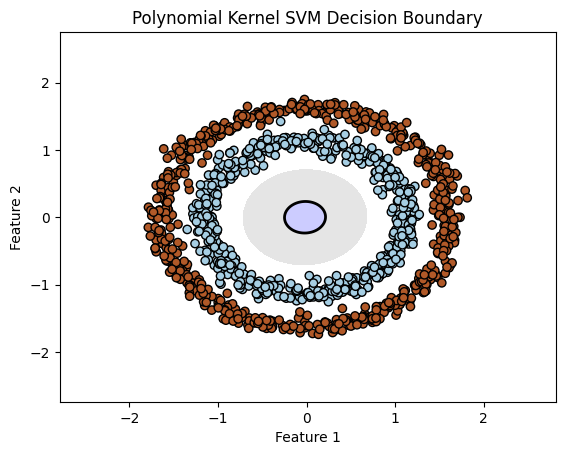

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot the decision boundary
def plot_decision_boundary(X, y, alpha, bias, kernel_function, degree=2, coef0=1):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

    # Flatten the grid to pass into the kernel function
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Calculate the decision function for each point in the grid
    Z = np.array([sum(alpha[i] * y[i] * kernel_function(grid_point, X[i], degree, coef0)
                      for i in range(len(y))) for grid_point in grid])
    Z = Z + bias
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and margins
    plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.2, colors=['blue', 'gray', 'red'])
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    plt.title('Polynomial Kernel SVM Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Define the polynomial kernel function
def calculate_poly_kernel(x, y, degree=2, coef0=1):
    return (coef0 + np.dot(x, y)) ** degree

# Plot the decision boundary for the polynomial kernel SVM
plot_decision_boundary(X3_train_scaled, y3_train, alpha3, bias3, calculate_poly_kernel)



# I also made the decision boundary as well :)